In [403]:
import os

import pandas as pd
import geopandas as gpd
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.optimize import curve_fit

#### Loading taxi dataset

In [4]:
folderpath = "C:/Users/anape/nyc-taxi/data/"
files = os.listdir(folderpath)
parquet_files = [file for file in files if file.endswith('.parquet')]

dataframes = [pd.read_parquet(os.path.join(folderpath, p_file)) for p_file in parquet_files]

for df in dataframes:
    for column in df.columns:
        df.rename(columns={column: column.lower()}, inplace=True)

df2023 = pd.concat([df for df in dataframes], axis=0, ignore_index=True)
# df2023.info()

In [465]:
pd.concat([df for df in dataframes], axis=0, ignore_index=True).shape

(38310226, 19)

In [8]:
df2023['month'] = df2023['tpep_pickup_datetime'].dt.month
df2023['month_name'] = df2023['tpep_pickup_datetime'].dt.month_name()

df2023['dayofweek'] = df2023['tpep_pickup_datetime'].dt.day_of_week
df2023['day_name'] = df2023['tpep_pickup_datetime'].dt.day_name()

df2023['time'] = df2023['tpep_pickup_datetime'].dt.hour
df2023['dayofyear'] = df2023['tpep_pickup_datetime'].dt.dayofyear

df2023['year'] = df2023['tpep_pickup_datetime'].dt.year


In [24]:
df2023.loc[:, 'duration'] = df2023['tpep_dropoff_datetime'] - df2023['tpep_pickup_datetime']

In [25]:
df2023 = df2023[df2023['duration'] > pd.Timedelta(minutes=5)]
df2023 = df2023[df2023['duration'] < pd.Timedelta(hours=5)]

In [9]:
print('Initially, the dataset contains entries from the years:',df2023['year'].unique())

# removing entries from different years
df2023 = df2023[df2023['year'] == 2023]

Initially, the dataset contains entries from the years: [2023 2022 2008 2009 2003 2001 2014 2002 2024]


In [10]:
df2023[['year', 'week', 'day']] = df2023['tpep_pickup_datetime'].dt.isocalendar()[['year', 'week', 'day']]

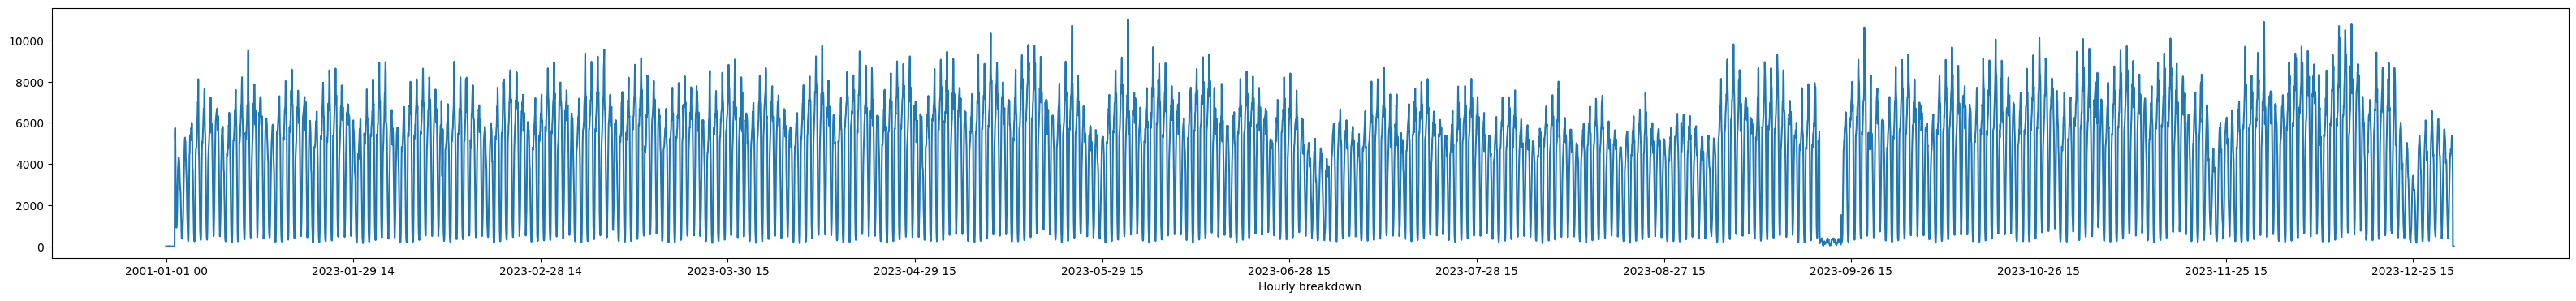

In [48]:
fig, ax = plt.subplots(figsize = (40,4))
ax.plot(df2023.date_and_hour.value_counts(sort = False).sort_index())
ax.set_xlabel('Hourly breakdown')
ax.set_xticks(range(0,365*24,24*30))
plt.show()

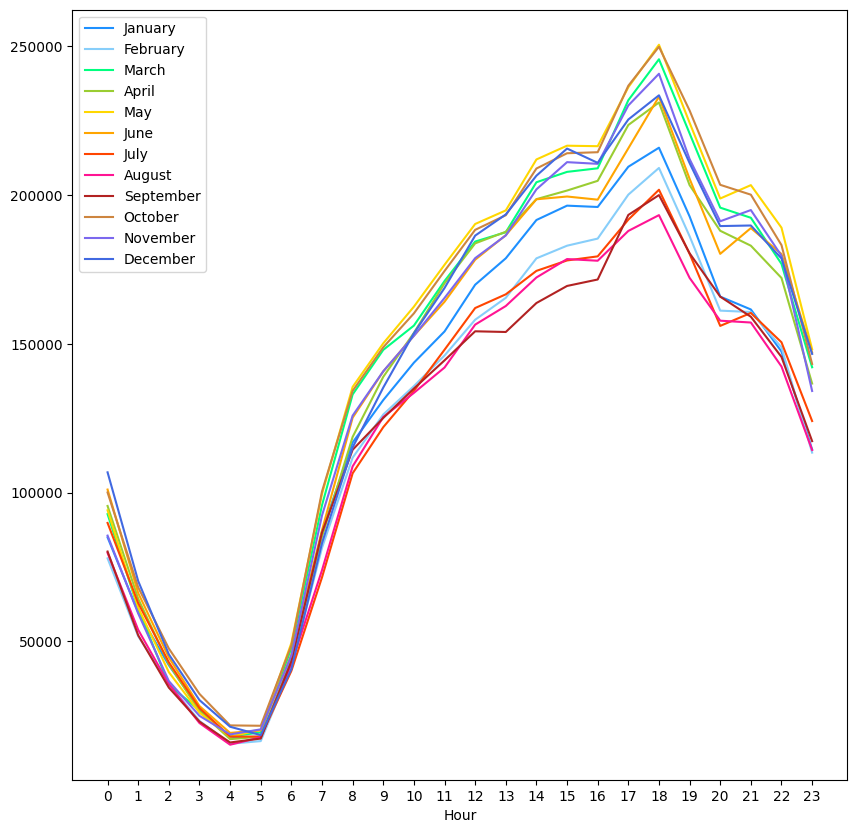

In [63]:
colors = ['dodgerblue', 'lightskyblue', 'springgreen', 'yellowgreen', 'gold', 'orange', 'orangered', 'deeppink', 'firebrick', 'peru', 'mediumslateblue', 'royalblue']

fig, ax = plt.subplots(figsize=(10,10))
for m, group in df2023.groupby('month'):
    data = group.time.value_counts(sort = False).sort_index()
    ax.plot(data, label = group['month_name'].unique()[0], color=colors[m-1])
    ax.set_xticks(range(0,24,1))
    ax.set_xlabel('Hour')
plt.legend()
plt.show()

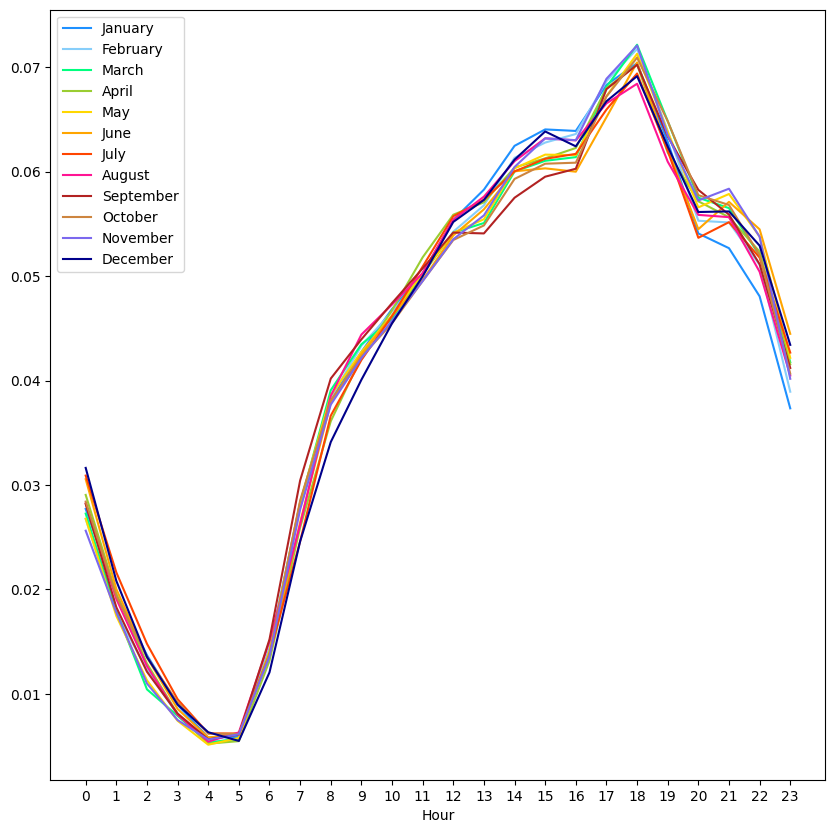

In [64]:
colors = ['dodgerblue', 'lightskyblue', 'springgreen', 'yellowgreen', 'gold', 'orange', 'orangered', 'deeppink', 'firebrick', 'peru', 'mediumslateblue', 'darkblue']

fig, ax = plt.subplots(figsize=(10,10))
for m, group in df2023.groupby('month'):
    data = group.time.value_counts(normalize = True, sort = False).sort_index()
    ax.plot(data, label = group['month_name'].unique()[0], color=colors[m-1])
    ax.set_xticks(range(0,24,1))
    ax.set_xlabel('Hour')
plt.legend()
plt.show()

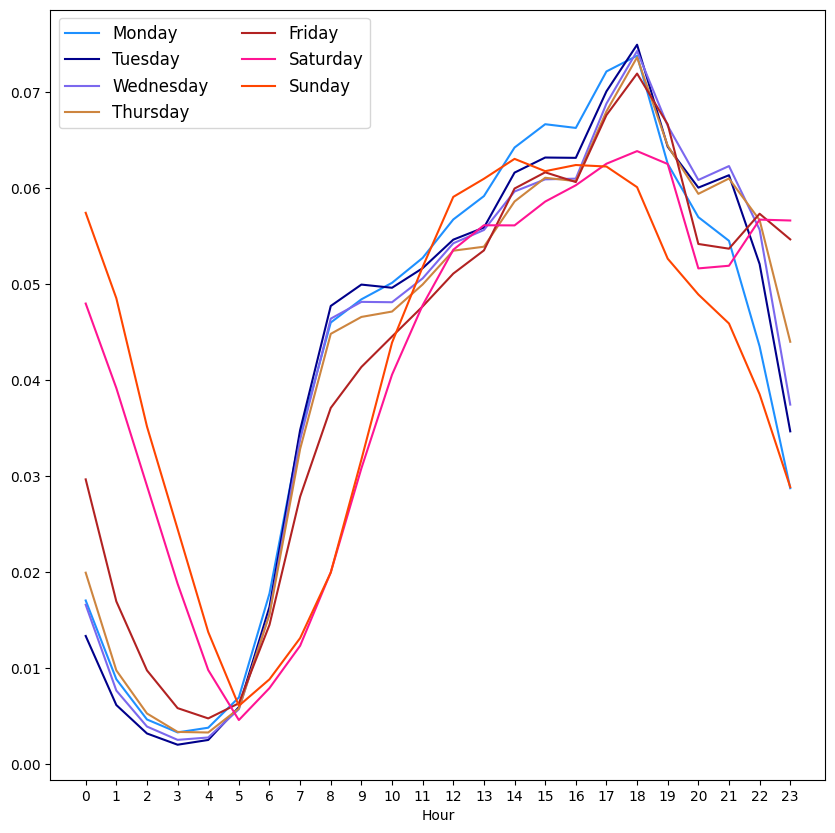

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
for m, group in df2023.groupby('dayofweek'):
    data = group.time.value_counts(normalize = True, sort = False).sort_index()
    ax.plot(data, label = group['day_name'].unique()[0], color = colors[-m])
    ax.set_xticks(range(0,24,1))
    ax.set_xlabel('Hour')
plt.legend(ncol = 2, fontsize = 12)
plt.show()

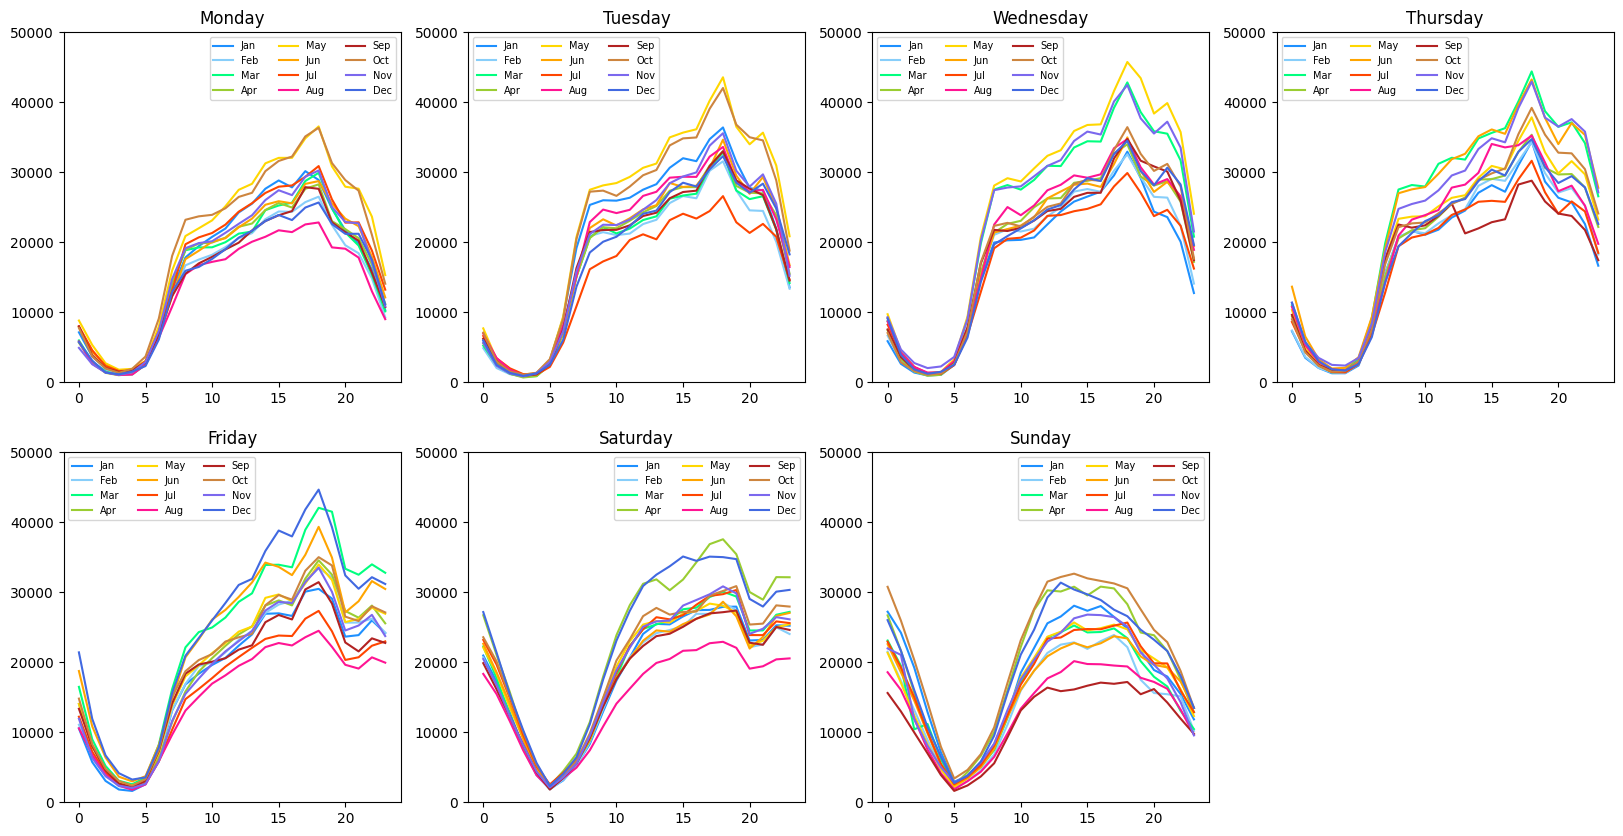

In [47]:
fig, axes = plt.subplots(2,4, figsize = (20,10))

for i in sorted(df2023['dayofweek'].unique()):
    df = df2023[df2023['dayofweek']==i]
    ax = axes.flatten()[i]
    for m, group in df.groupby('month'):
        data = group.time.value_counts(sort = False).sort_index()
        ax.plot(data, label = group['month_name'].unique()[0][:3], color=colors[m-1])
    ax.set_ylim(0, 50000)
    ax.set_title(f"{df['day_name'].unique()[0]}")
    ax.legend(fontsize=7,ncol=3)
fig.delaxes(axes.flatten()[-1])
plt.show()